<a href="https://colab.research.google.com/github/ubettercallsaul/Project-ML1/blob/main/curvefit_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chi-square distribution and leat square fitting<br>
https://www.asc.ohio-state.edu/gan.1/teaching/spring04/Chapter6.pdf<br>
χ2 = Σ (Oi - Ei)2 / Ei<br>
valid for regression cost function? seems it is for chi-squared goodness of fit test <br>

Chi-squared <br>
https://stackoverflow.com/questions/52591979/how-to-obtain-the-chi-squared-value-as-an-output-of-scipy-optimize-curve-fit

Curve fitting comparison

In [56]:
import numpy as np
import matplotlib.pyplot as plt

#  # Scipy curve_fit
# from scipy.optimize import curve_fit

# # lmfit. https://pypi.org/project/lmfit/

In [57]:
# constant acceleration motion
def modelTrue(t,y0,v0,a):
  return y0 + (v0 *t) + (0.5 * a * t ** 2)

In [58]:
# Data
rng = np.random.default_rng()

ns = 20
tData = np.linspace(0,3,ns)
y0True = 10
v0True = 20
aTrue = -9.8

yTrue = modelTrue(tData,y0True,v0True,aTrue)
yErr = np.random.randn(ns) * 0.5
yData = yTrue + yErr

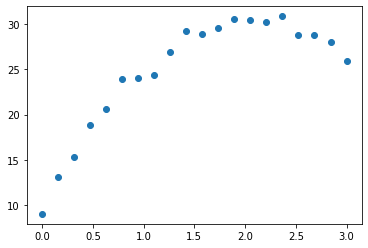

In [59]:
plt.plot(tData, yData, 'o')
plt.show()

In [60]:
def corrFromCov(cov):
    vs = np.diag(cov)
    return cov / np.sqrt(np.matrix(vs).transpose() @ np.matrix(vs))

###SciPy curve_fit

In [61]:
from scipy.optimize import curve_fit

In [62]:
def model(t,p1,p2,p3):
  return p1 + p2*t + p3*t**2

In [63]:
# Fit model
popt, pcov = curve_fit(model, tData, yData)

# unpack the results
p1fit, p2fit,p3fit = popt
sp1fit,sp2fit,sp3fit = np.sqrt(np.diag(pcov)) # standard error

# print the fit results:
print('parameter +/- 1sigma')
print("p1: %.2f +/- %.2f"%(p1fit,sp1fit))
print("p2: %.2f +/- %.2f"%(p2fit,sp2fit))
print("p3: %.2f +/- %.2f"%(p3fit,sp3fit))

parameter +/- 1sigma
p1: 9.69 +/- 0.43
p2: 20.09 +/- 0.66
p3: -4.85 +/- 0.21


In [64]:
pcorr = corrFromCov(pcov)
print("covariance:")
print(pcov)
print("correlation:")
print(pcorr)

covariance:
[[ 0.1811277  -0.23505364  0.0636185 ]
 [-0.23505364  0.43238261 -0.13430573]
 [ 0.0636185  -0.13430573  0.04476858]]
correlation:
[[ 1.         -0.83992484  0.70648732]
 [-0.83992484  1.         -0.96532553]
 [ 0.70648732 -0.96532553  1.        ]]


In [111]:
def calChiSquared(residual,sigma):
  r = residual
  chisq = sum((r / sigma) ** 2)
  # chisq = (r.T @ r)/sigma**2
  return 

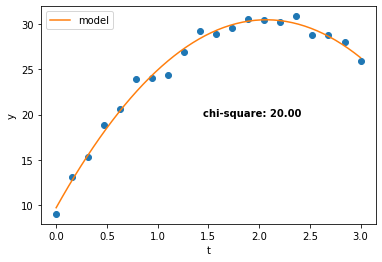

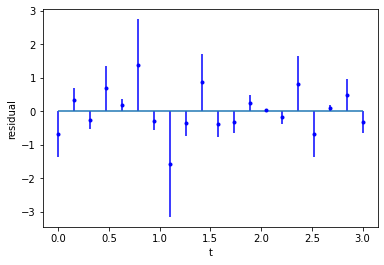

In [112]:
from scipy.stats import chisquare

# plot the data and fit results
yfit = model(tData,p1fit,p2fit,p3fit)
residual = yData - yfit

# plt.errorbar(tData,yData,abs(residual),fmt='b.', label="data")
plt.plot(tData, yData, 'o')
plt.xlabel("t")
plt.ylabel("y")

t = np.linspace(0,3)
plt.plot(t,model(t,p1fit,p2fit,p3fit), label="model")
plt.legend()

# compute chi-square
sigma = np.std(residual)
chisq = sum((yData - yfit)**2/sigma**2) # correct??

plt.figtext(0.5,0.5,"chi-square: %.2f"%chisq,fontweight="bold")

# make a residuals plot
plt.figure()
plt.errorbar(tData,residual,abs(residual),fmt='b.')
plt.hlines(0,tData.min(),tData.max())
plt.xlabel("t")
plt.ylabel("residual")

plt.show()

In [107]:
# chi2 = calChiSquared(residual,np.var(residual))
chi2 = calChiSquared(residual,np.std(residual))
print(chi2)

20.0


In curve_fit(), the argument sigma can be used to set the weights of the data points in the fit. These “describe” 1-sigma errors when the argument absolute_sigma=True1.

In other words, sigma is scaled to match the sample variance of the residuals after the fit. Default is False. Mathematically, pcov (absolute_sigma=False) = pcov (absolute_sigma=True) * chisq (popt)/ (M-N)2.

###